<a href="https://colab.research.google.com/github/ggyuchive/MLpractice/blob/main/Introduction%20to%20Machine%20Learning/Supervised_Learning(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###지도학습  
**분류 (Classification)** : 가능성 있는 class label 중 하나를 예측  
**회귀 (Regression)** : 연속적인 실수를 예측

In [1]:
# import Numpy, Pandas, Matplotlib, Sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn

## 이진 분류 문제 (Binary Classification)

### Note 1.
**load_breast_cancer** 데이터 이용  
특성 30개 (569*30)  
malignant: 양성 / benign: 음성

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.feature_names)
print(cancer.target_names)
print(cancer.data.shape, cancer.target.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30) (569,)


In [11]:
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (
    cancer.data, cancer.target, random_state = 0
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [ ]:
cancer_df = pd.DataFrame(X_train, columns = cancer.feature_names)
cancer_df

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9230769230769231

### Note 2.
Neighbors 수를 다르게 하여 knn 모델 생성 및 정확도 계산  
Neighbors 변화에 따른 정확도 그래프 표현 

In [49]:
train_accuracy = []
test_accuracy = []

maxn = 11
for n in range(1,maxn):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

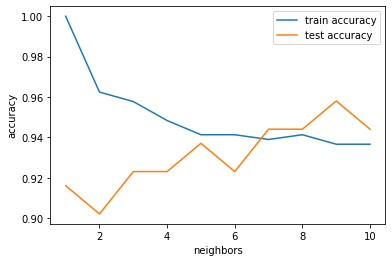

In [51]:
plt.plot(range(1,maxn), train_accuracy, label="train accuracy")
plt.plot(range(1,maxn), test_accuracy, label="test accuracy")
plt.ylabel("accuracy") 
plt.xlabel("neighbors")
plt.legend()